####CSC 478 Project Proposal (Autumn 2017)

####Name: 
Kevin Kai Chung Ying

####Date:
Oct/21/2017

####Application:
Recommendation System

####Brief description of dataset:
The Datasets were donated by KKBox through Kaggle.com. There are 5 different datasets are provided including 1 train, 1 test, 1 songs , 1 songs extra info, members dataset. The song list includes about 2.6 mil of songs track with songs’s length, gene_id, artist_name, composer, lyricist, language. KKBox is an Asia’s leading music streaming service holds about 30 million song track Asia-pop music library. The purpose of particular dataset donation aims to look for a better recommendation system for music engine for their new customers. The potential analysis target is to predict which songs would be users’ favorite and chance to repetitively listen the SAME song within a month. The provided dataset also includes a member info table which contains members’ location, gender, register channel, register date and expiration date.

####Classification Target
•	Target=1 means user is repetitively listening SAME event(s) triggered within a month after the very first observable listening event. 
•	Target=0 means otherwise.

####Attributes from Training and Testing Set
•	6 Attributes in the Dataset
o	user_id (Char), song_id (Char),  source_system_tab(char, 2 variations), source_screen_name (char, 2 variations), source_type(char, 2 variations)
•	7377418 rows of Records on the Training dataset
•	The aggregation of tables will be necessary for the analysis.

####Algorithm still not confirmed, will depends on the accuracy.
•	KNN (User-based / Item-based / Content Based Collaborative System)
•	Correlation between users
•	Cosine Similarity
•	MAE or RMSE Evaluation





In [ ]:
import numpy as np
import pandas as pd
import urllib, time, json, sqlite3

In [ ]:
music_train = music_train.reindex(np.random.permutation(music_train.index))


#Prepare and aggregate Dataset

In [ ]:
import sqlite3
from sqlite3 import OperationalError
import urllib, time, json, sqlite3

In [ ]:
train='''Create Table Train(
    customer_id VARCHAR(100),
    song_id VARCHAR(100),
    source_system_tab VARCHAR(20),
    source_screen_name VARCHAR(30),
    source_type VARCHAR(30),
    Target integer(2),
    
    CONSTRAINT Train_PK Primary Key (customer_id, song_id)

)
'''

mem='''Create Table Members(

    customer_id VARCHAR(100),
    city INTEGER(5),
    age INTEGER(5),
    gender VARCHAR(2),
    registered_via integer(10),
    reg_time VARCHAR(2),
    exp_date VARCHAR(2),
 
    CONSTRAINT Members_PK PRIMARY KEY (customer_id)
)
'''

songs='''Create Table Songs(
    
    song_id VARCHAR(100),
    song_length INTEGER(20),
    genre_ids INTEGER(20),
    artist_name VARCHAR(100),
    composer VARCHAR(100),
    lyricist VARCHAR(100),
    language INTEGER(10),
    
    CONSTRAINT Songs_PK PRIMARY KEY (song_id)
)
'''

In [ ]:
conn=sqlite3.connect('project.db')
c=conn.cursor()

c.execute('Drop Table  if exists Train;')
c.execute(train)

c.execute('Drop Table  if exists Members;')
c.execute(mem)

c.execute('Drop Table  if exists Songs;')
c.execute(songs)

conn.commit()
conn.close()


In [ ]:
start=time.time()
count=0
source=open ('./Data/Music/train.csv')
train_lst=[]

content=source.read()
lines=content.strip().split('\n')

for line in lines:
    line=line.strip().split(',')
    train_lst.append(line)
    count+=1

train_lst=train_lst[1:] #Skip the first row(attributes)    
end=time.time()
end-start

In [ ]:
len(train_lst)

In [ ]:
start=time.time()
count=0
source=open ('./Data/Music/members.csv')
members_lst=[]

content=source.read()
lines=content.strip().split('\n')

for line in lines:
    line=line.strip().split(',')
    members_lst.append(line)
    count+=1

members_lst=members_lst[1:] #Skip the first row(attributes)    
end=time.time()
end-start

In [ ]:
len(members_lst)

In [ ]:
start=time.time()
count=0
source=open ('./Data/Music/songs.csv')
songs_lst=[]

content=source.read()
lines=content.strip().split('\n')

for line in lines:
    line=line.strip().split(',')
    songs_lst.append(line)
    count+=1

songs_lst=songs_lst[1:] #Skip the first row(attributes)    
end=time.time()
end-start

In [ ]:
songs_lst[0:50]

In [ ]:
start=time.time()
mem_name_lst=[]
song_name_lst=[]
for i in range(len(members_lst)):
    mem_name_lst.append(members_lst[i][0])
    
for i in range(len(songs_lst)):
    song_name_lst.append(songs_lst[i][0])

mem_name_lst=np.array(mem_name_lst)
song_name_lst=np.array(song_name_lst)

cust_songs_tbl=pd.DataFrame(0,index=mem_name_lst,columns=song_name_lst)
cust_songs_tbl.shape

end=time.time()
end-start

In [ ]:
songs_lst[0:5]

In [ ]:
try:
cust_songs_tbl.ix[train_lst[i][0]][train_lst[i][1]]=
cust_songs_tbl
train_lst[0][0]

In [ ]:
start=time.time()
conn=sqlite3.connect('project.db')
c=conn.cursor()
c.executemany('INSERT OR IGNORE INTO Members VALUES (?,?,?,?,?,?,?);', members_lst)        
conn.commit()
end=time.time()
end-start

In [ ]:
count=0
for line in songs_lst:
    try:
        c.execute('INSERT OR IGNORE INTO Songs VALUES (?,?,?,?,?,?,?);', line)
        count+=1
    except:
        print(count)
conn.commit()

In [ ]:
c.executemany('INSERT OR IGNORE INTO Train VALUES (?,?,?,?,?,?);', train_lst)
conn.commit()


In [ ]:
songs_lst[605199]

In [261]:
start=time.time()
query1='''select T.customer_id, T.Song_id, T.source_system_tab,T.source_screen_name, T.source_type,
M.city, M.age, M.gender,M.registered_via, M.reg_time, exp_date,
s.genre_ids,s.song_length,s.language,s.artist_name,s.composer, s.lyricist, T.target
from Train T 
left Join Members M on T.customer_id=M.customer_id
Left join songs s on s.song_id=t.song_id;
'''


query2="Select * from Train"
#query3="select * from songs where artist_name='俞隆華'"
#query4="Select * from Members"
pd.read_sql_query(query1, conn).to_csv('query1.csv', index=True)
end=time.time()
start-end

-576.3770248889923

###Aggregate the tables from Train, Songs, Members and Load into the 'query1.csv'

In [1]:
import pandas as pd
import numpy as np
original_tbl=pd.read_csv('''query1.csv''', na_values=["?"])
print(original_tbl.shape)
original_tbl.head(3)

(7377418, 19)


,Unnamed: 0,customer_id,song_id,source_system_tab,source_screen_name,source_type,city,age,gender,registered_via,reg_time,exp_date,genre_ids,song_length,language,artist_name,composer,lyricist,Target
0,0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,0,NaN,7,20120102,20171005,359,206471.0,52.0,Bastille,Dan Smith| Mark Crew,NaN,1
1,1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,13,24,female,9,20110525,20170911,1259,284584.0,52.0,Various Artists,NaN,NaN,1
2,2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,13,24,female,9,20110525,20170911,1259,225396.0,52.0,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,1


#Data Analysis

In [49]:
#Copy the original dataset to aother variable to avoid any changes to the original dataset
music_tbl=original_tbl.copy()
print(music_tbl.shape)
music_tbl.head(3)

(7377418, 19)


,Unnamed: 0,customer_id,song_id,source_system_tab,source_screen_name,source_type,city,age,gender,registered_via,reg_time,exp_date,genre_ids,song_length,language,artist_name,composer,lyricist,Target
0,0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,0,NaN,7,20120102,20171005,359,206471.0,52.0,Bastille,Dan Smith| Mark Crew,NaN,1
1,1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,13,24,female,9,20110525,20170911,1259,284584.0,52.0,Various Artists,NaN,NaN,1
2,2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,13,24,female,9,20110525,20170911,1259,225396.0,52.0,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,1


In [50]:
music_tbl.drop('Unnamed: 0',axis=1,inplace=True)

In [51]:
music_tbl.describe(include='all')

,customer_id,song_id,source_system_tab,source_screen_name,source_type,city,age,gender,registered_via,reg_time,exp_date,genre_ids,song_length,language,artist_name,composer,lyricist,Target
count,7377418,7377418,7359047,6962614,7355879,7.377418e+06,7.377418e+06,4415939,7.377418e+06,7.377418e+06,7.377418e+06,7259039,7.377380e+06,7.377380e+06,7377380,5701740,4198611,7.377418e+06
unique,30755,359966,9,20,12,NaN,NaN,2,NaN,NaN,NaN,572,NaN,NaN,40586,76070,33893,NaN
top,MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,my library,Local playlist more,local-library,NaN,NaN,male,NaN,NaN,NaN,465,NaN,NaN,Various Artists,周杰倫,阿信,NaN
freq,5819,13973,3684730,3228202,2261399,NaN,NaN,2297623,NaN,NaN,NaN,3717730,NaN,NaN,303617,201910,151301,NaN
mean,NaN,NaN,NaN,NaN,NaN,7.511399e+00,1.753927e+01,NaN,6.794068e+00,2.012810e+07,2.017157e+07,NaN,2.451213e+05,1.860954e+01,NaN,NaN,NaN,5.035171e-01
std,NaN,NaN,NaN,NaN,NaN,6.641625e+00,2.155447e+01,NaN,2.275774e+00,3.017281e+04,3.869831e+03,NaN,6.734489e+04,2.117690e+01,NaN,NaN,NaN,4.999877e-01
min,NaN,NaN,NaN,NaN,NaN,1.000000e+00,-4.300000e+01,NaN,3.000000e+00,2.004033e+07,1.970010e+07,NaN,1.393000e+03,-1.000000e+00,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,NaN,4.000000e+00,2.011070e+07,2.017091e+07,NaN,2.147260e+05,3.000000e+00,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,5.000000e+00,2.100000e+01,NaN,7.000000e+00,2.013102e+07,2.017093e+07,NaN,2.418120e+05,3.000000e+00,NaN,NaN,NaN,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,1.300000e+01,2.900000e+01,NaN,9.000000e+00,2.015102e+07,2.017101e+07,NaN,2.721600e+05,5.200000e+01,NaN,NaN,NaN,1.000000e+00


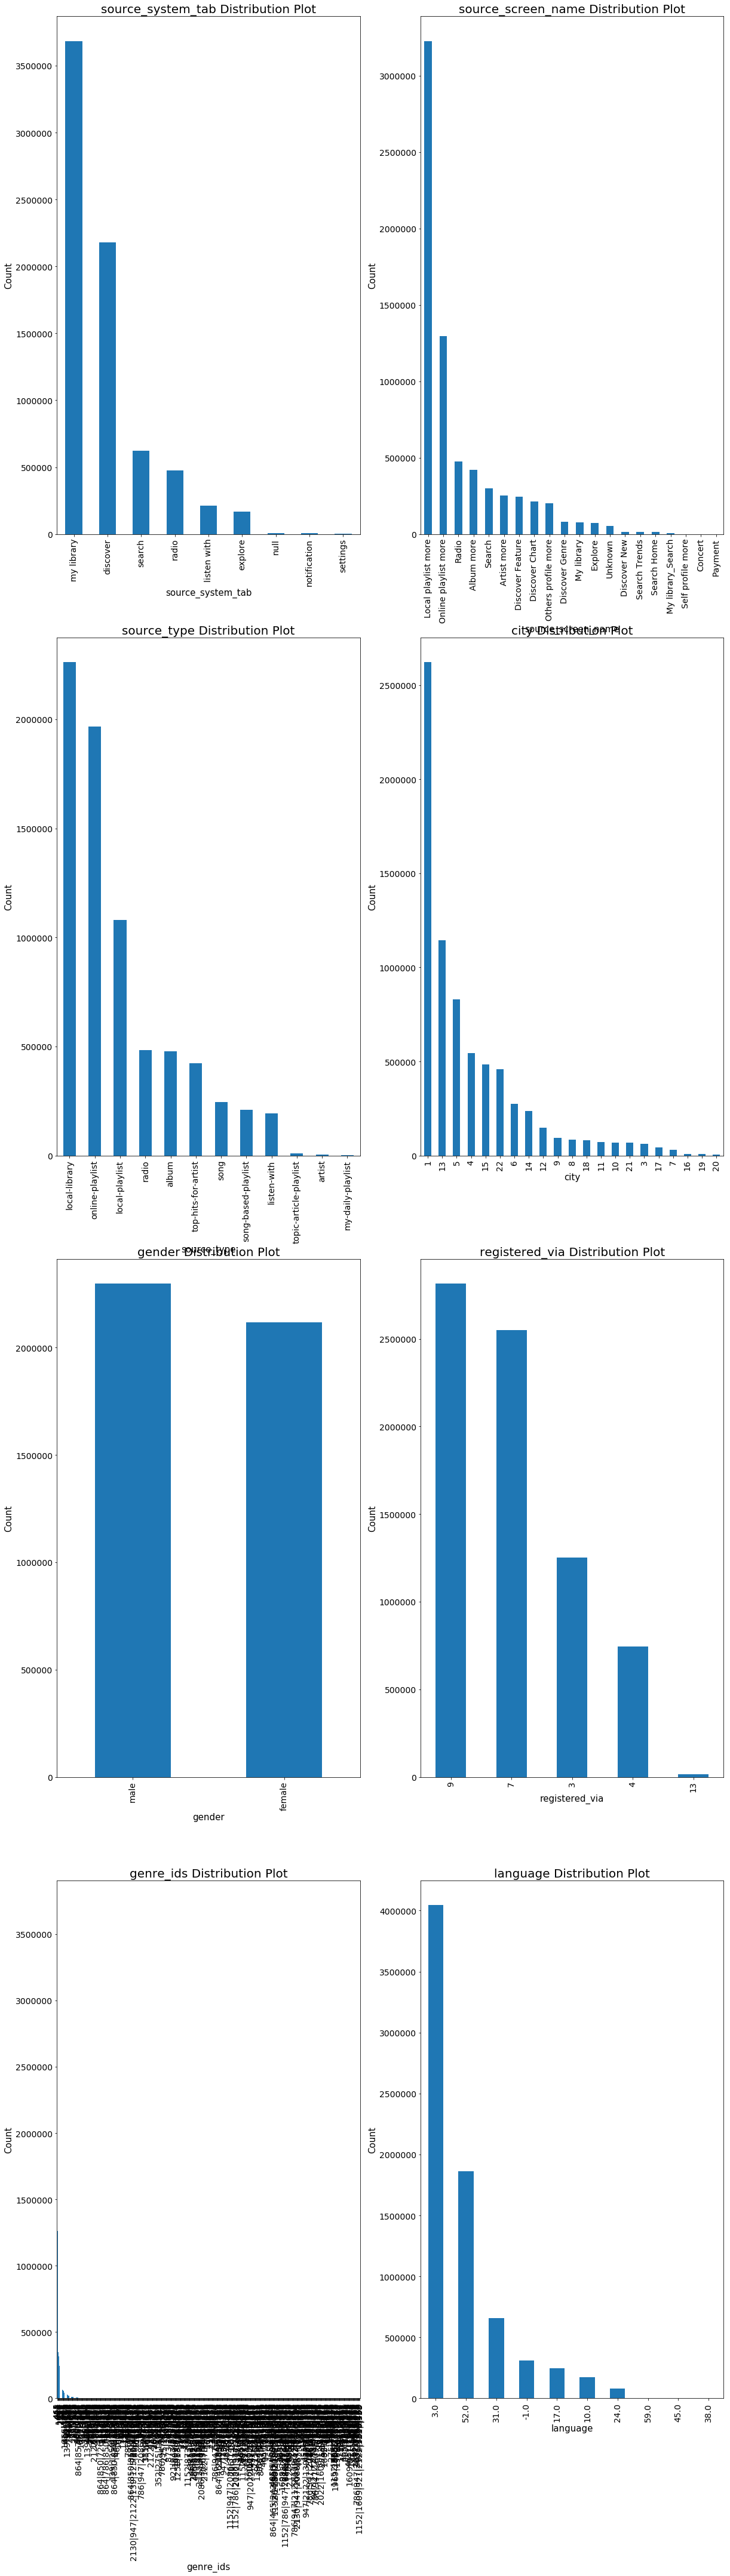

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(20, 180))
# Create an Axes object.

ax1 = fig.add_subplot(8,2,1) # one row, two column, first plot
# Plot the data.
music_tbl['source_system_tab'].value_counts().plot(kind='bar')
ax1.set_title("source_system_tab Distribution Plot", size=20)
ax1.set_xlabel("source_system_tab", size=15)
ax1.set_ylabel("Count", size=15)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)

ax2 = fig.add_subplot(8,2,2)
music_tbl['source_screen_name'].value_counts().plot(kind='bar')
ax2.set_title("source_screen_name Distribution Plot", size=20)
ax2.set_xlabel("source_screen_name", size=15)
ax2.set_ylabel("Count", size=15)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

ax3 = fig.add_subplot(8,2,3)
music_tbl['source_type'].value_counts().plot(kind='bar')
ax3.set_title("source_type Distribution Plot", size=20)
ax3.set_xlabel("source_type", size=15)
ax3.set_ylabel("Count", size=15)
ax3.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='y', labelsize=14)


ax4 = fig.add_subplot(8,2,4)
music_tbl['city'].value_counts().plot(kind='bar')
ax4.set_title("city Distribution Plot", size=20)
ax4.set_xlabel("city", size=15)
ax4.set_ylabel("Count", size=15)
ax4.tick_params(axis='x', labelsize=14)
ax4.tick_params(axis='y', labelsize=14)

ax5 = fig.add_subplot(8,2,5)
music_tbl['gender'].value_counts().plot(kind='bar')
ax5.set_title("gender Distribution Plot", size=20)
ax5.set_xlabel("gender", size=15)
ax5.set_ylabel("Count", size=15)
ax5.tick_params(axis='x', labelsize=14)
ax5.tick_params(axis='y', labelsize=14)

ax6 = fig.add_subplot(8,2,6)
music_tbl['registered_via'].value_counts().plot(kind='bar')
ax6.set_title("registered_via Distribution Plot", size=20)
ax6.set_xlabel("registered_via", size=15)
ax6.set_ylabel("Count", size=15)
ax6.tick_params(axis='x', labelsize=14)
ax6.tick_params(axis='y', labelsize=14)



ax8 = fig.add_subplot(8,2,8)
music_tbl['language'].value_counts().plot(kind='bar')
ax8.set_title("language Distribution Plot", size=20)
ax8.set_xlabel("language", size=15)
ax8.set_ylabel("Count", size=15)
ax8.tick_params(axis='x', labelsize=14)
ax8.tick_params(axis='y', labelsize=14)

In [135]:
i_lst=[]
cnt_lst=[]
val_lst=[]
for i ,(val, cnt) in enumerate(music_tbl['genre_ids'].value_counts().iteritems()):
    i_lst.append(i)
    cnt_lst.append(cnt)
    val_lst.append(val)
i_lst=np.array(i_lst)
cnt_lst=np.array(cnt_lst)
val_lst=np.array(val_lst)

idx=np.argsort(cnt_lst)[::-1]
type(val_lst)
type(cnt_lst)
aa=pd.DataFrame({'count':cnt_lst[idx].tolist(),'genre_ids':val_lst[idx].tolist()})

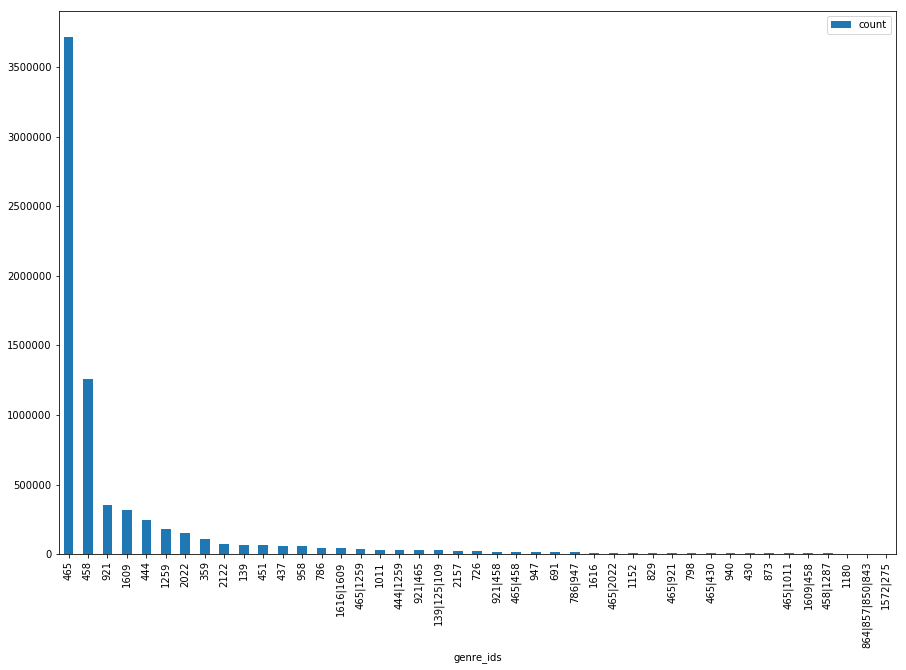

In [136]:
aa[aa['count']>5000].set_index('genre_ids').plot.bar(figsize=(15,10)
                                                     ,title='Genre_ids Count'
                                                     , figsize=(15,10)
                                                     , fontsize=1)
plt.show()

In [138]:
np.set_printoptions(precision=2, linewidth=120, suppress=True)

music_tbl.groupby('Target').describe()

age          city      exp_date      language  \
Target                                                                 
0      count  3.662762e+06  3.662762e+06  3.662762e+06  3.662744e+06   
       mean   1.755013e+01  7.430372e+00  2.017139e+07  1.919697e+01   
       std    2.276344e+01  6.673605e+00  4.159684e+03  2.137405e+01   
       min   -4.300000e+01  1.000000e+00  1.970010e+07 -1.000000e+00   
       25%    0.000000e+00  1.000000e+00  2.017091e+07  3.000000e+00   
       50%    2.100000e+01  5.000000e+00  2.017092e+07  3.000000e+00   
       75%    2.900000e+01  1.300000e+01  2.017101e+07  5.200000e+01   
       max    1.051000e+03  2.200000e+01  2.020102e+07  5.900000e+01   
1      count  3.714656e+06  3.714656e+06  3.714656e+06  3.714636e+06   
       mean   1.752856e+01  7.591295e+00  2.017174e+07  1.803031e+01   
       std    2.029198e+01  6.608967e+00  3.552815e+03  2.096459e+01   
       min   -4.300000e+01  1.000000e+00  2.004102e+07 -1.000000e+00   
       25%    0.000000e+00  1.000000e+00  2.017091e+07  3.000000e+00   
       50%    2.100000e+01  5.000000e+00  2.017093e+07  3.000000e+00   
       75%    2.800000e+01  1.300000e+01  2.017101e+07  3.100000e+01   
       max    1.030000e+03  2.200000e+01  2.020102e+07  5.900000e+01   

                  reg_time  registered_via   song_length  
Target                                                    
0      count  3.662762e+06    3.662762e+06  3.662744e+06  
       mean   2.012817e+07    6.771395e+00  2.452441e+05  
       std    3.036962e+04    2.276317e+00  7.273728e+04  
       min    2.004033e+07    3.000000e+00  1.950000e+03  
       25%    2.011070e+07    4.000000e+00  2.135770e+05  
       50%    2.013102e+07    7.000000e+00  2.415800e+05  
       75%    2.015110e+07    9.000000e+00  2.723700e+05  
       max    2.017013e+07    1.300000e+01  7.621067e+06  
1      count  3.714656e+06    3.714656e+06  3.714636e+06  
       mean   2.012804e+07    6.816424e+00  2.450003e+05  
       std    2.997736e+04    2.275018e+00  6.156687e+04  
       min    2.004033e+07    3.000000e+00  1.393000e+03  
       25%    2.011071e+07    4.000000e+00  2.154570e+05  
       50%    2.013102e+07    7.000000e+00  2.420810e+05  
       75%    2.015101e+07    9.000000e+00  2.717770e+05  
       max    2.017013e+07    1.300000e+01  1.085171e+07

#Classification Analysis

In [2]:
#Copy the original dataset to aother variable to avoid any changes to the original dataset
tbl=original_tbl.copy()
print(tbl.shape)
tbl.head(3)

(7377418, 19)


,Unnamed: 0,customer_id,song_id,source_system_tab,source_screen_name,source_type,city,age,gender,registered_via,reg_time,exp_date,genre_ids,song_length,language,artist_name,composer,lyricist,Target
0,0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,0,NaN,7,20120102,20171005,359,206471.0,52.0,Bastille,Dan Smith| Mark Crew,NaN,1
1,1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,13,24,female,9,20110525,20170911,1259,284584.0,52.0,Various Artists,NaN,NaN,1
2,2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,13,24,female,9,20110525,20170911,1259,225396.0,52.0,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,1


In [3]:
#Drop all the null values
tbl.drop(tbl[tbl['genre_ids'].isnull()].index,axis=0,inplace=True)
tbl.drop(tbl[tbl['gender'].isnull()].index,axis=0,inplace=True)
tbl.drop(tbl[tbl['age']==0].index,axis=0,inplace=True)
tbl.drop(tbl[tbl['age']>144].index,axis=0,inplace=True)
#Categorized the 'Age' attributes values to 4 category
tbl['age']=pd.qcut(tbl.age,[0, .25, .5, .75, 1.],['child','young','mid-age','old']) 
#Categorized the "Song_Length" attributes values to 4 category
tbl['song_length']=pd.qcut(tbl.song_length,[0, .25, .5, .75, 1.],['short','med_short','mid_long','long'])

In [4]:
tbl_target=tbl['Target']
print(tbl_target.shape)
tbl_target.head(3)

(4218192,)


1    1
2    1
3    1
Name: Target, dtype: int64

In [5]:
#drop some of the attributes for now. 
tbl.drop('Unnamed: 0',axis=1,inplace=True)
tbl.drop('customer_id',axis=1,inplace=True)
tbl.drop('song_id',axis=1,inplace=True)
tbl.drop('reg_time',axis=1,inplace=True)
tbl.drop('exp_date',axis=1,inplace=True)
tbl.drop('genre_ids',axis=1,inplace=True)
tbl.drop('artist_name',axis=1,inplace=True)
tbl.drop('composer',axis=1,inplace=True)
tbl.drop('lyricist',axis=1,inplace=True)
tbl.drop('Target',axis=1,inplace=True)

In [6]:
print(tbl.shape)
tbl.head(3)

(4218192, 9)


,source_system_tab,source_screen_name,source_type,city,age,gender,registered_via,song_length,language
1,my library,Local playlist more,local-playlist,13,young,female,9,long,52.0
2,my library,Local playlist more,local-playlist,13,young,female,9,med_short,52.0
3,my library,Local playlist more,local-playlist,13,young,female,9,mid_long,-1.0


In [7]:
#Turn 2 attributes into string before assigning dummy valuables
tbl.registered_via=list(map(str, tbl.registered_via))
tbl.language=list(map(str, tbl.language))

In [8]:
#turn all the categical variables into dummies valuables
tbl_dummies=pd.get_dummies(tbl[['source_system_tab'
                                ,'source_screen_name'
                                ,'source_type'
                                ,'city'
                                ,'age'
                                ,'gender'
                                ,'registered_via'
                                ,'song_length'
                                ,'language']])
print(tbl_dummies.shape)
tbl_dummies.head(5)

(4218192, 67)


,city,source_system_tab_discover,source_system_tab_explore,source_system_tab_listen with,source_system_tab_my library,source_system_tab_notification,source_system_tab_null,source_system_tab_radio,source_system_tab_search,source_system_tab_settings,...,language_-1.0,language_10.0,language_17.0,language_24.0,language_3.0,language_31.0,language_38.0,language_45.0,language_52.0,language_59.0
1,13,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,13,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,13,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,13,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,15,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
tbl_train,tbl_test,tbl_train_target,tbl_test_target=train_test_split(tbl_dummies
                                                                     ,tbl_target
                                                                     ,test_size=0.2
                                                                     ,random_state=28)

/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
print(tbl_train.shape)
print(tbl_train_target.shape)

(3374553, 67)
(3374553,)


In [11]:
print(tbl_test.shape)
print(tbl_test_target.shape)

(843639, 67)
(843639,)


In [12]:
#Nornalizeing the Training and Testing dataset
from sklearn import preprocessing
np.set_printoptions(precision=2, linewidth=120, suppress=True)

min_max_scaler = preprocessing.MinMaxScaler().fit(tbl_train)
tbl_train_norm=min_max_scaler.transform(tbl_train)
tbl_test_norm=min_max_scaler.transform(tbl_test)
print(tbl_train_norm.shape)
print(tbl_test_norm.shape)

(3374553, 67)
(843639, 67)


In [13]:
tbl_train_norm[0]

array([ 0.57,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ])

In [14]:
tbl_test_norm[0]

array([ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.])

In [15]:
tbl_train_target[0:5]

646174     1
6937017    0
2629608    1
3227976    0
5443148    1
Name: Target, dtype: int64

In [16]:
tbl_test_target[0:5]

3549611    1
4792767    1
3363281    1
4477299    0
1466151    1
Name: Target, dtype: int64

In [72]:
###KNN Classifier (Using the Default Parameters)

In [17]:
#Import KNN classifier 
from sklearn import neighbors, tree, naive_bayes
import time

In [ ]:
knnclf = neighbors.KNeighborsClassifier(n_neighbors=10, weights='distance')
knnclf.fit(tbl_train_norm, tbl_train_target)

In [43]:
#This is the KNN Function for iterating the best K model
import matplotlib.pyplot as plt
def knn_func(K,tbl_train_norm,tbl_train_target,tbl_test_norm,tbl_test_target):
    train_score_lst=[]
    test_score_lst=[]
    k_lst=[]
    
    for i in range(10,K+1):
        n_neighbors=i
        knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
        knnclf.fit(tbl_train_norm, tbl_train_target)
        k_lst.append(i)
        test_score_lst.append(knnclf.score(tbl_test_norm, tbl_test_target))
        train_score_lst.append(knnclf.score(tbl_train_norm, tbl_train_target))
        
        
    score_df=pd.DataFrame({'train_score':train_score_lst,'test_score':test_score_lst,"K":k_lst})
    score_df.plot(x='K',figsize=(10,5))
    plt.title('Training and Testing Score')
    plt.xlabel('K')
    plt.ylabel('Score')
    plt.xlim([0,K+1])
    plt.show()
    
    print ('Max Test score is ',max(test_score_lst),'with K = ',k_lst[test_score_lst.index(max(test_score_lst))])
    print ('Max Train score is ',max(train_score_lst))
    return

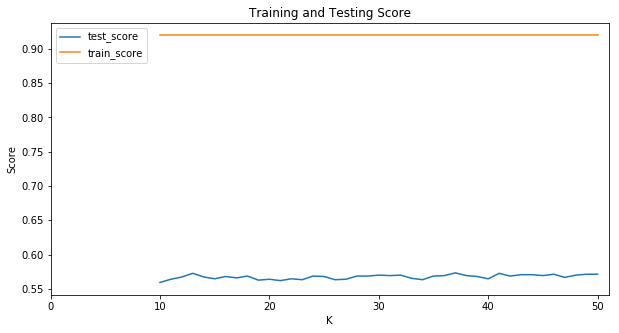

Max Test score is  0.573333333333 with K =  37
Max Train score is  0.919714285714


In [44]:
knn_func(50,tbl_train_norm[10000:17000],tbl_train_target[10000:17000],tbl_test_norm[1500:3000],tbl_test_target[1500:3000])

###Navie Bayes (Gaussian) Classifier (Using the Default Parameters)

In [53]:
#Set up Naive_bayes Gaussian classifier
nbclf = naive_bayes.GaussianNB()
nbclf=nbclf.fit(tbl_train_norm, tbl_train_target)

Train Score is 0.61396
Test Score is 0.61115


In [66]:
print('Train Score is',nbclf.score(tbl_train_norm, tbl_train_target))
print('Test Score is',nbclf.score(tbl_test_norm, tbl_test_target))

Train Score is 0.614284321509
Test Score is 0.614292369129


In [69]:
#10-fold Cross-Validation 
from sklearn import cross_validation
cv_scores = cross_validation.cross_val_score(nbclf, tbl_dummies,tbl_target, cv=10)
print('Overall Average accuracy: %f +/- %f'%(cv_scores.mean(),cv_scores.std()))

Overall Average accuracy: 0.600732 +/- 0.025094


###Decision Tree Classifier (Using the Default Parameters)

In [62]:
#Set up Decision Tree classifier
treeclf = tree.DecisionTreeClassifier(criterion='entropy')
#Plug in the train dataset with target class
treeclf = treeclf.fit(tbl_train_norm, tbl_train_target)

In [64]:
print('Traing set score is',treeclf.score(tbl_train_norm, tbl_train_target))
print('Testing set score is',treeclf.score(tbl_test_norm, tbl_test_target))

Traing set score is 0.676782080471
Testing set score is 0.64873245547


In [70]:
#10-fold Cross-Validation 
from sklearn import cross_validation
cv_scores = cross_validation.cross_val_score(treeclf, tbl_dummies,tbl_target, cv=10)
print('Overall Average accuracy: %f +/- %f'%(cv_scores.mean(),cv_scores.std()))

Overall Average accuracy: 0.591732 +/- 0.027024


###Linear Discriminant Analysis (LDA)

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(tbl_train_norm, tbl_train_target)

/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Traing set score is 0.616
Testing set score is 0.57


In [61]:
print('Traing set score is',ldclf.score(tbl_train_norm, tbl_train_target))
print('Testing set score is',ldclf.score(tbl_test_norm, tbl_test_target))

Traing set score is 0.621270728301
Testing set score is 0.620957542266


In [71]:
#10-fold Cross-Validation 
from sklearn import cross_validation
cv_scores = cross_validation.cross_val_score(ldclf, tbl_dummies,tbl_target, cv=10)
print('Overall Average accuracy: %f +/- %f'%(cv_scores.mean(),cv_scores.std()))

/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warn

Overall Average accuracy: 0.620694 +/- 0.039255
